## Intelligent Robotics Python Library 사용 예제 4
## Written by 최동일, dongilc@mju.ac.kr

In [1]:
import intelligent_robotics as ir
import sympy
sympy.init_printing()

#### 예제 4. 연습문제 3-11의 RRR형 로봇

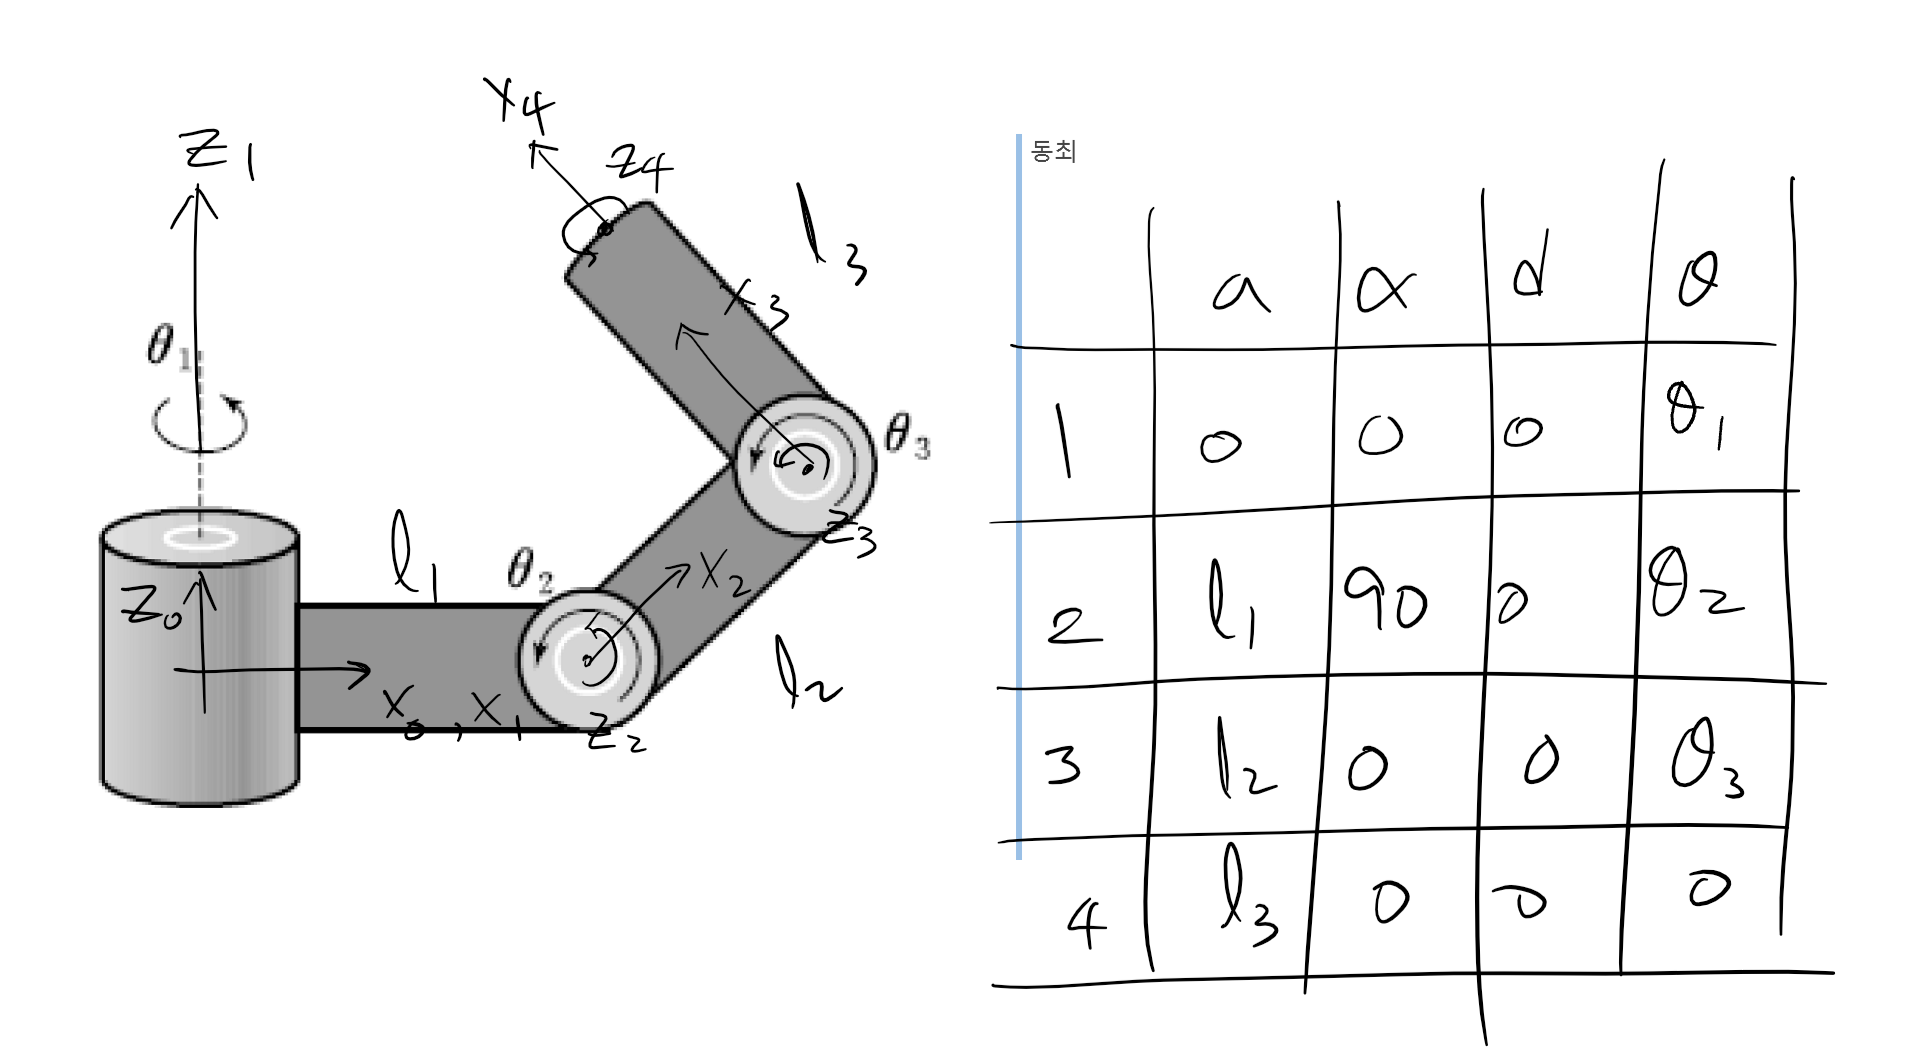

In [2]:
from IPython.display import Image
Image('figure/practice_3.11_fig.PNG', width=300)

In [3]:
th1,th2,th3 = ir.dynamicsymbols('th1,th2,th3')

In [4]:
l1,l1g,l2,l2g,l3,l3g,IG1,IG2,IG3,m1,m2,m3 = sympy.symbols('l1,l1g,l2,l2g,l3,l3g,IG1,IG2,IG3,m1,m2,m3')

#### DH Parameter를 이용한 동차변환 구하기

In [5]:
T01 = ir.DH(0,0,0,th1)

In [6]:
T12 = ir.DH(l1,sympy.rad(90),0,th2)

In [7]:
T23 = ir.DH(l2,0,0,th3)

In [8]:
T34 = ir.DH(l3,0,0,0)

In [9]:
T01, T12, T23, T34

⎛⎡cos(th₁(t))  -sin(th₁(t))  0  0⎤  ⎡cos(th₂(t))  -sin(th₂(t))  0   l₁⎤  ⎡cos(
⎜⎢                               ⎥  ⎢                                 ⎥  ⎢    
⎜⎢sin(th₁(t))  cos(th₁(t))   0  0⎥  ⎢     0            0        -1  0 ⎥  ⎢sin(
⎜⎢                               ⎥, ⎢                                 ⎥, ⎢    
⎜⎢     0            0        1  0⎥  ⎢sin(th₂(t))  cos(th₂(t))   0   0 ⎥  ⎢    
⎜⎢                               ⎥  ⎢                                 ⎥  ⎢    
⎝⎣     0            0        0  1⎦  ⎣     0            0        0   1 ⎦  ⎣    

th₃(t))  -sin(th₃(t))  0  l₂⎤  ⎡1  0  0  l₃⎤⎞
                            ⎥  ⎢           ⎥⎟
th₃(t))  cos(th₃(t))   0  0 ⎥  ⎢0  1  0  0 ⎥⎟
                            ⎥, ⎢           ⎥⎟
 0            0        1  0 ⎥  ⎢0  0  1  0 ⎥⎟
                            ⎥  ⎢           ⎥⎟
 0            0        0  1 ⎦  ⎣0  0  0  1 ⎦⎠

#### 자코비안 구하기

In [10]:
w_0_0 = sympy.Matrix([[0],[0],[0]])
w_1_1 = ir.get_angular_vel_R(T01,w_0_0,th1.diff())
w_2_2 = ir.get_angular_vel_R(T12,w_1_1,th2.diff())
w_3_3 = ir.get_angular_vel_R(T23,w_2_2,th3.diff())
w_4_4 = ir.get_angular_vel_R(T34,w_3_3,0)

In [11]:
w_1_1,w_2_2,w_3_3,w_4_4

⎛              ⎡            d         ⎤  ⎡                         d          
⎜              ⎢sin(th₂(t))⋅──(th₁(t))⎥  ⎢ sin(th₂(t))⋅cos(th₃(t))⋅──(th₁(t)) 
⎜⎡    0     ⎤  ⎢            dt        ⎥  ⎢                         dt         
⎜⎢          ⎥  ⎢                      ⎥  ⎢                                    
⎜⎢    0     ⎥  ⎢            d         ⎥  ⎢                          d         
⎜⎢          ⎥, ⎢cos(th₂(t))⋅──(th₁(t))⎥, ⎢- sin(th₂(t))⋅sin(th₃(t))⋅──(th₁(t))
⎜⎢d         ⎥  ⎢            dt        ⎥  ⎢                          dt        
⎜⎢──(th₁(t))⎥  ⎢                      ⎥  ⎢                                    
⎜⎣dt        ⎦  ⎢      d               ⎥  ⎢                         d          
⎜              ⎢      ──(th₂(t))      ⎥  ⎢                         ──(th₂(t)) 
⎝              ⎣      dt              ⎦  ⎣                         dt         

                          d          ⎤  ⎡                         d           
+ sin(th₃(t))⋅cos(th₂(t))⋅──(th₁(t)) ⎥  ⎢ sin(th₂(t

In [12]:
v_0_0 = sympy.Matrix([[0],[0],[0]])
v_1_1 = ir.get_linear_vel_R(T01,w_0_0,v_0_0)
v_2_2 = ir.get_linear_vel_R(T12,w_1_1,v_1_1)
v_3_3 = ir.get_linear_vel_R(T23,w_2_2,v_2_2)
v_4_4 = ir.get_linear_vel_R(T34,w_3_3,v_3_3)

In [13]:
v_1_1,v_2_2,v_3_3,v_4_4

⎛                       ⎡                        d                  ⎤  ⎡      
⎜                       ⎢         l₂⋅sin(th₃(t))⋅──(th₂(t))         ⎥  ⎢      
⎜     ⎡      0       ⎤  ⎢                        dt                 ⎥  ⎢      
⎜⎡0⎤  ⎢              ⎥  ⎢                                           ⎥  ⎢      
⎜⎢ ⎥  ⎢      0       ⎥  ⎢                        d                  ⎥  ⎢      
⎜⎢0⎥, ⎢              ⎥, ⎢         l₂⋅cos(th₃(t))⋅──(th₂(t))         ⎥, ⎢      
⎜⎢ ⎥  ⎢    d         ⎥  ⎢                        dt                 ⎥  ⎢      
⎜⎣0⎦  ⎢-l₁⋅──(th₁(t))⎥  ⎢                                           ⎥  ⎢      
⎜     ⎣    dt        ⎦  ⎢     d                           d         ⎥  ⎢     d
⎜                       ⎢- l₁⋅──(th₁(t)) - l₂⋅cos(th₂(t))⋅──(th₁(t))⎥  ⎢- l₁⋅─
⎝                       ⎣     dt                          dt        ⎦  ⎣     d

                                                          d                   
                                           l₂⋅sin(t

In [14]:
qd = sympy.Matrix([[th1.diff()],[th2.diff()],[th3.diff()]])

In [15]:
J_4_4 = ir.get_Jacobian_from_vel(w_4_4,v_4_4,qd)

In [16]:
# Body Jacobian
J_4_4

⎡                      0                           l₂⋅sin(th₃(t))     0 ⎤
⎢                                                                       ⎥
⎢                      0                         l₂⋅cos(th₃(t)) + l₃  l₃⎥
⎢                                                                       ⎥
⎢-l₁ - l₂⋅cos(th₂(t)) - l₃⋅cos(th₂(t) + th₃(t))           0           0 ⎥
⎢                                                                       ⎥
⎢             sin(th₂(t) + th₃(t))                        0           0 ⎥
⎢                                                                       ⎥
⎢             cos(th₂(t) + th₃(t))                        0           0 ⎥
⎢                                                                       ⎥
⎣                      0                                  1           1 ⎦

In [17]:
w_0_4 = ir.get_R_from_T(T01*T12*T23*T34)*w_4_4
v_0_4 = ir.get_R_from_T(T01*T12*T23*T34)*v_4_4
J_0_4 = ir.get_Jacobian_from_vel(w_0_4,v_0_4,qd)

In [18]:
# Space Jacobian
J_0_4

⎡-(l₁ + l₂⋅cos(th₂(t)) + l₃⋅cos(th₂(t) + th₃(t)))⋅sin(th₁(t))  -(l₂⋅sin(th₂(t)
⎢                                                                             
⎢(l₁ + l₂⋅cos(th₂(t)) + l₃⋅cos(th₂(t) + th₃(t)))⋅cos(th₁(t))   -(l₂⋅sin(th₂(t)
⎢                                                                             
⎢                             0                                       l₂⋅cos(t
⎢                                                                             
⎢                             0                                               
⎢                                                                             
⎢                             0                                               
⎢                                                                             
⎣                             1                                               

) + l₃⋅sin(th₂(t) + th₃(t)))⋅cos(th₁(t))  -l₃⋅sin(th₂(t) + th₃(t))⋅cos(th₁(t))
                                                   

#### 머니퓰레이터 정역학 구하기

In [19]:
f_x, f_y, f_z = sympy.symbols('f_x, f_y, f_z')

In [20]:
f_4_4 = sympy.Matrix([[f_x],[f_y],[f_z]])
n_4_4 = sympy.Matrix([[0],[0],[0]])

In [21]:
f_3_3 = ir.get_statics_force_i(T34, f_4_4)
f_2_2 = ir.get_statics_force_i(T23, f_3_3)
f_1_1 = ir.get_statics_force_i(T12, f_2_2)

In [22]:
f_3_3, f_2_2, f_1_1

⎛⎡fₓ ⎤  ⎡fₓ⋅cos(th₃(t)) - f_y⋅sin(th₃(t))⎤  ⎡fₓ⋅cos(th₂(t) + th₃(t)) - f_y⋅sin
⎜⎢   ⎥  ⎢                                ⎥  ⎢                                 
⎜⎢f_y⎥, ⎢fₓ⋅sin(th₃(t)) + f_y⋅cos(th₃(t))⎥, ⎢                       -f_z      
⎜⎢   ⎥  ⎢                                ⎥  ⎢                                 
⎝⎣f_z⎦  ⎣              f_z               ⎦  ⎣fₓ⋅sin(th₂(t) + th₃(t)) + f_y⋅cos

(th₂(t) + th₃(t))⎤⎞
                 ⎥⎟
                 ⎥⎟
                 ⎥⎟
(th₂(t) + th₃(t))⎦⎠

In [23]:
n_3_3 = ir.get_statics_torque_i(T34, n_4_4, f_3_3)
n_2_2 = ir.get_statics_torque_i(T23, n_3_3, f_2_2)
n_1_1 = ir.get_statics_torque_i(T12, n_2_2, f_1_1)

In [24]:
n_3_3, n_2_2, n_1_1

⎛⎡   0   ⎤  ⎡              f_z⋅l₃⋅sin(th₃(t))              ⎤  ⎡               
⎜⎢       ⎥  ⎢                                              ⎥  ⎢               
⎜⎢-f_z⋅l₃⎥, ⎢          -f_z⋅(l₂ + l₃⋅cos(th₃(t)))          ⎥, ⎢-fₓ⋅l₁⋅sin(th₂(
⎜⎢       ⎥  ⎢                                              ⎥  ⎢               
⎝⎣f_y⋅l₃ ⎦  ⎣f_y⋅l₃ + l₂⋅(fₓ⋅sin(th₃(t)) + f_y⋅cos(th₃(t)))⎦  ⎣               

               f_z⋅(l₂⋅sin(th₂(t)) + l₃⋅sin(th₂(t) + th₃(t)))                 
                                                                              
t) + th₃(t)) - fₓ⋅l₂⋅sin(th₃(t)) - f_y⋅l₁⋅cos(th₂(t) + th₃(t)) - f_y⋅l₂⋅cos(th
                                                                              
            -f_z⋅(l₁ + l₂⋅cos(th₂(t)) + l₃⋅cos(th₂(t) + th₃(t)))              

              ⎤⎞
              ⎥⎟
₃(t)) - f_y⋅l₃⎥⎟
              ⎥⎟
              ⎦⎠

In [25]:
T = sympy.Matrix([[n_1_1[2]],[n_2_2[2]],[n_3_3[2]]])
F = sympy.Matrix([[f_x],[f_y],[f_z]])

In [26]:
T, F

⎛⎡-f_z⋅(l₁ + l₂⋅cos(th₂(t)) + l₃⋅cos(th₂(t) + th₃(t)))⎤  ⎡fₓ ⎤⎞
⎜⎢                                                    ⎥  ⎢   ⎥⎟
⎜⎢   f_y⋅l₃ + l₂⋅(fₓ⋅sin(th₃(t)) + f_y⋅cos(th₃(t)))   ⎥, ⎢f_y⎥⎟
⎜⎢                                                    ⎥  ⎢   ⎥⎟
⎝⎣                       f_y⋅l₃                       ⎦  ⎣f_z⎦⎠

In [27]:
# T = J^T * F
# tau1           fx
# tau2  =  J^T * fy
# tau3           fz
Jt = ir.get_Jacobian_from_ft(F,T)

In [28]:
# 정역학식을 이용한 자코비안 구하기
J = Jt.T

In [29]:
# Body Jacobian
J

⎡                      0                           l₂⋅sin(th₃(t))     0 ⎤
⎢                                                                       ⎥
⎢                      0                         l₂⋅cos(th₃(t)) + l₃  l₃⎥
⎢                                                                       ⎥
⎣-l₁ - l₂⋅cos(th₂(t)) - l₃⋅cos(th₂(t) + th₃(t))           0           0 ⎦

In [30]:
# 속도전파식을 이용해 구한 자코비안과 정역학식을 이용해 구한 자코비안의 결과가 같은지 체크. 모두 0으로 나오면 OK
sympy.simplify(J_4_4[0:3,:] - J)

⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦

#### 머니퓰레이터 동역학 구하기

In [31]:
# Netwon-Euler Method. 1. Forward Iteration

In [32]:
w_0_0 = sympy.Matrix([[0],[0],[0]])
w_1_1 = ir.get_angular_vel_R(T01,w_0_0,th1.diff())
w_2_2 = ir.get_angular_vel_R(T12,w_1_1,th2.diff())
w_3_3 = ir.get_angular_vel_R(T23,w_2_2,th3.diff())
w_4_4 = ir.get_angular_vel_R(T34,w_3_3,0)
wd_0_0 = sympy.Matrix([[0],[0],[0]])
wd_1_1 = ir.get_angular_acc_R(T01,w_0_0,wd_0_0,th1.diff(),th1.diff().diff())
wd_2_2 = ir.get_angular_acc_R(T12,w_1_1,wd_1_1,th2.diff(),th2.diff().diff())
wd_3_3 = ir.get_angular_acc_R(T23,w_2_2,wd_2_2,th3.diff(),th3.diff().diff())
wd_4_4 = ir.get_angular_acc_R(T34,w_3_3,wd_3_3,0,0)

In [33]:
v_0_0 = sympy.Matrix([[0],[0],[0]])
v_1_1 = ir.get_linear_vel_R(T01,w_0_0,v_0_0)
v_2_2 = ir.get_linear_vel_R(T12,w_1_1,v_1_1)
v_3_3 = ir.get_linear_vel_R(T23,w_2_2,v_2_2)
v_4_4 = ir.get_linear_vel_R(T34,w_3_3,v_3_3)
vd_0_0 = sympy.Matrix([[0],[0],[0]])
vd_1_1 = ir.get_linear_acc_R(T01,w_0_0,wd_0_0,vd_0_0)
vd_2_2 = ir.get_linear_acc_R(T12,w_1_1,wd_1_1,vd_1_1)
vd_3_3 = ir.get_linear_acc_R(T23,w_2_2,wd_2_2,vd_2_2)
vd_4_4 = ir.get_linear_acc_R(T34,w_3_3,wd_3_3,vd_3_3)

In [34]:
r_1_G1 = sympy.Matrix([[l1g],[0],[0]])
r_2_G2 = sympy.Matrix([[l2g],[0],[0]])
r_3_G3 = sympy.Matrix([[l3g],[0],[0]])
vd_1_G1 = ir.get_com_acc(vd_1_1,w_1_1,wd_1_1,r_1_G1)
vd_2_G2 = ir.get_com_acc(vd_2_2,w_2_2,wd_2_2,r_2_G2)
vd_3_G3 = ir.get_com_acc(vd_3_3,w_3_3,wd_3_3,r_3_G3)

In [35]:
# Netwon-Euler Method. 2. Inverse Iteration

In [36]:
g = sympy.symbols('g')

In [37]:
f_4_4 = sympy.Matrix([[0],[0],[0]])
n_4_4 = sympy.Matrix([[0],[0],[0]])
g_0 = sympy.Matrix([[0],[0],[-g]])

In [38]:
f_3_3 = ir.get_dynamics_force_i(T34,T01@T12@T23,m3,g_0,vd_3_G3,f_4_4)
f_2_2 = ir.get_dynamics_force_i(T23,T01@T12,m2,g_0,vd_2_G2,f_3_3)
f_1_1 = ir.get_dynamics_force_i(T12,T01,m1,g_0,vd_1_G1,f_2_2)

In [39]:
# 참고 - 실행시간이 좀 오래걸림.
Ixx1,Iyy1,Izz1,Ixx2,Iyy2,Izz2,Ixx3,Iyy3,Izz3 = sympy.symbols('Ixx1,Iyy1,Izz1,Ixx2,Iyy2,Izz2,Ixx3,Iyy3,Izz3')
I_1_G1 = sympy.Matrix([[Ixx1,0,0],[0,Iyy1,0],[0,0,Izz1]])
I_2_G2 = sympy.Matrix([[Ixx2,0,0],[0,Iyy2,0],[0,0,Izz2]])
I_3_G3 = sympy.Matrix([[Ixx3,0,0],[0,Iyy3,0],[0,0,Izz3]])
n_3_3 = ir.get_dynamics_torque_i(T34,n_4_4,f_3_3,f_4_4,w_3_3,wd_3_3,r_3_G3,I_3_G3)
n_2_2 = ir.get_dynamics_torque_i(T23,n_3_3,f_2_2,f_3_3,w_2_2,wd_2_2,r_2_G2,I_2_G2)
n_1_1 = ir.get_dynamics_torque_i(T12,n_2_2,f_1_1,f_2_2,w_1_1,wd_1_1,r_1_G1,I_1_G1)

In [40]:
tau = sympy.Matrix([[n_1_1[2]],[n_2_2[2]],[n_3_3[2]]])

In [41]:
qdd = sympy.Matrix([[th1.diff().diff()],[th2.diff().diff()],[th3.diff().diff()]])
M_ne, C_ne, G_ne = ir.get_EoM_from_T(tau,qdd,g)

In [42]:
M_ne

⎡                                                                             
⎢  Ixx₂⋅cos(2⋅th₂(t))   Ixx₂   Ixx₃⋅cos(2⋅th₂(t) + 2⋅th₃(t))   Ixx₃   Iyy₂⋅cos
⎢- ────────────────── + ──── - ───────────────────────────── + ──── + ────────
⎢          2             2                   2                  2             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎣                                                                             

                                                                              
(2⋅th₂(t))   Iyy₂   Iyy₃⋅cos(2⋅th₂(t) + 2⋅th₃(t))   Iyy₃            2        2
────────── + ──── + ───────────────────────────── +

In [43]:
C_ne

⎡⎛                   d                                          d             
⎢⎜Ixx₂⋅sin(2⋅th₂(t))⋅──(th₂(t)) + Ixx₃⋅sin(2⋅th₂(t) + 2⋅th₃(t))⋅──(th₂(t)) + I
⎢⎝                   dt                                         dt            
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   

In [44]:
G_ne

⎡                                   0                                    ⎤
⎢                                                                        ⎥
⎢g⋅(l₂⋅m₃⋅cos(th₂(t)) + l2g⋅m₂⋅cos(th₂(t)) + l3g⋅m₃⋅cos(th₂(t) + th₃(t)))⎥
⎢                                                                        ⎥
⎣                     g⋅l3g⋅m₃⋅cos(th₂(t) + th₃(t))                      ⎦

In [45]:
# Lagrangian Method

In [46]:
w_0_0 = sympy.Matrix([[0],[0],[0]])
w_1_1 = ir.get_angular_vel_R(T01,w_0_0,th1.diff())
w_2_2 = ir.get_angular_vel_R(T12,w_1_1,th2.diff())
w_3_3 = ir.get_angular_vel_R(T23,w_2_2,th3.diff())

In [47]:
w_1_1,w_2_2,w_3_3

⎛              ⎡            d         ⎤  ⎡                         d          
⎜              ⎢sin(th₂(t))⋅──(th₁(t))⎥  ⎢ sin(th₂(t))⋅cos(th₃(t))⋅──(th₁(t)) 
⎜⎡    0     ⎤  ⎢            dt        ⎥  ⎢                         dt         
⎜⎢          ⎥  ⎢                      ⎥  ⎢                                    
⎜⎢    0     ⎥  ⎢            d         ⎥  ⎢                          d         
⎜⎢          ⎥, ⎢cos(th₂(t))⋅──(th₁(t))⎥, ⎢- sin(th₂(t))⋅sin(th₃(t))⋅──(th₁(t))
⎜⎢d         ⎥  ⎢            dt        ⎥  ⎢                          dt        
⎜⎢──(th₁(t))⎥  ⎢                      ⎥  ⎢                                    
⎜⎣dt        ⎦  ⎢      d               ⎥  ⎢                         d          
⎜              ⎢      ──(th₂(t))      ⎥  ⎢                         ──(th₂(t)) 
⎝              ⎣      dt              ⎦  ⎣                         dt         

                          d          ⎤⎞
+ sin(th₃(t))⋅cos(th₂(t))⋅──(th₁(t)) ⎥⎟
                          dt         ⎥⎟
          

In [48]:
v_0_0 = sympy.Matrix([[0],[0],[0]])
v_1_1 = ir.get_linear_vel_R(T01,w_0_0,v_0_0)
v_2_2 = ir.get_linear_vel_R(T12,w_1_1,v_1_1)
v_3_3 = ir.get_linear_vel_R(T23,w_2_2,v_2_2)

In [49]:
v_1_1,v_2_2,v_3_3

⎛                       ⎡                        d                  ⎤⎞
⎜                       ⎢         l₂⋅sin(th₃(t))⋅──(th₂(t))         ⎥⎟
⎜     ⎡      0       ⎤  ⎢                        dt                 ⎥⎟
⎜⎡0⎤  ⎢              ⎥  ⎢                                           ⎥⎟
⎜⎢ ⎥  ⎢      0       ⎥  ⎢                        d                  ⎥⎟
⎜⎢0⎥, ⎢              ⎥, ⎢         l₂⋅cos(th₃(t))⋅──(th₂(t))         ⎥⎟
⎜⎢ ⎥  ⎢    d         ⎥  ⎢                        dt                 ⎥⎟
⎜⎣0⎦  ⎢-l₁⋅──(th₁(t))⎥  ⎢                                           ⎥⎟
⎜     ⎣    dt        ⎦  ⎢     d                           d         ⎥⎟
⎜                       ⎢- l₁⋅──(th₁(t)) - l₂⋅cos(th₂(t))⋅──(th₁(t))⎥⎟
⎝                       ⎣     dt                          dt        ⎦⎠

In [50]:
r_1_G1 = sympy.Matrix([[l1g],[0],[0]])
r_2_G2 = sympy.Matrix([[l2g],[0],[0]])
r_3_G3 = sympy.Matrix([[l3g],[0],[0]])
v_1_G1 = ir.get_com_vel(v_1_1,w_1_1,r_1_G1)
v_2_G2 = ir.get_com_vel(v_2_2,w_2_2,r_2_G2)
v_3_G3 = ir.get_com_vel(v_3_3,w_3_3,r_3_G3)

In [51]:
v_1_G1,v_2_G2,v_3_G3

⎛                                                                  ⎡          
⎜                  ⎡                     0                      ⎤  ⎢          
⎜⎡      0       ⎤  ⎢                                            ⎥  ⎢          
⎜⎢              ⎥  ⎢                   d                        ⎥  ⎢          
⎜⎢    d         ⎥  ⎢               l2g⋅──(th₂(t))               ⎥  ⎢          
⎜⎢l1g⋅──(th₁(t))⎥, ⎢                   dt                       ⎥, ⎢          
⎜⎢    dt        ⎥  ⎢                                            ⎥  ⎢          
⎜⎢              ⎥  ⎢     d                            d         ⎥  ⎢          
⎜⎣      0       ⎦  ⎢- l₁⋅──(th₁(t)) - l2g⋅cos(th₂(t))⋅──(th₁(t))⎥  ⎢     d    
⎜                  ⎣     dt                           dt        ⎦  ⎢- l₁⋅──(th
⎝                                                                  ⎣     dt   

                                                       d                      
                                        l₂⋅sin(th₃(

In [52]:
# 운동에너지
Ixx1,Iyy1,Izz1,Ixx2,Iyy2,Izz2,Ixx3,Iyy3,Izz3 = sympy.symbols('Ixx1,Iyy1,Izz1,Ixx2,Iyy2,Izz2,Ixx3,Iyy3,Izz3')
I_1_G1 = sympy.Matrix([[Ixx1,0,0],[0,Iyy1,0],[0,0,Izz1]])
I_2_G2 = sympy.Matrix([[Ixx2,0,0],[0,Iyy2,0],[0,0,Izz2]])
I_3_G3 = sympy.Matrix([[Ixx3,0,0],[0,Iyy3,0],[0,0,Izz3]])
T = ir.get_kinectic_energy(m1,v_1_G1,I_1_G1,w_1_1) + ir.get_kinectic_energy(m2,v_2_G2,I_2_G2,w_2_2) + ir.get_kinectic_energy(m3,v_3_G3,I_3_G3,w_3_3)

In [53]:
T

⎡                                  2                                          
⎢            2         ⎛d         ⎞         ⎛                            d    
⎢0.5⋅Ixx₂⋅sin (th₂(t))⋅⎜──(th₁(t))⎟  + Ixx₃⋅⎜0.5⋅sin(th₂(t))⋅cos(th₃(t))⋅──(th
⎣                      ⎝dt        ⎠         ⎝                            dt   

                                                                              
                                    d         ⎞ ⎛                        d    
₁(t)) + 0.5⋅sin(th₃(t))⋅cos(th₂(t))⋅──(th₁(t))⎟⋅⎜sin(th₂(t))⋅cos(th₃(t))⋅──(th
                                    dt        ⎠ ⎝                        dt   

                                                                              
                                d         ⎞               2         ⎛d        
₁(t)) + sin(th₃(t))⋅cos(th₂(t))⋅──(th₁(t))⎟ + 0.5⋅Iyy₂⋅cos (th₂(t))⋅⎜──(th₁(t)
                                dt        ⎠                         ⎝dt       

  2                                              

In [54]:
# 위치에너지 구하기

In [55]:
g = sympy.symbols('g')

In [56]:
g_0 = sympy.Matrix([[0],[0],[-g]])

In [57]:
T02 = T01*T12
T03 = T02*T23
V = ir.get_potential_energy(T01,m1,g_0,r_1_G1) + ir.get_potential_energy(T02,m2,g_0,r_2_G2) + ir.get_potential_energy(T03,m3,g_0,r_3_G3)

In [58]:
V

[g⋅l2g⋅m₂⋅sin(th₂(t)) + g⋅m₃⋅(l₂⋅sin(th₂(t)) + l3g⋅(sin(th₂(t))⋅cos(th₃(t)) + 
sin(th₃(t))⋅cos(th₂(t))))]

In [59]:
# 라그랑지안 구하기
L = ir.get_lagrangian(T,V)

In [60]:
L

⎡                                  2                                          
⎢            2         ⎛d         ⎞         ⎛                            d    
⎢0.5⋅Ixx₂⋅sin (th₂(t))⋅⎜──(th₁(t))⎟  + Ixx₃⋅⎜0.5⋅sin(th₂(t))⋅cos(th₃(t))⋅──(th
⎣                      ⎝dt        ⎠         ⎝                            dt   

                                                                              
                                    d         ⎞ ⎛                        d    
₁(t)) + 0.5⋅sin(th₃(t))⋅cos(th₂(t))⋅──(th₁(t))⎟⋅⎜sin(th₂(t))⋅cos(th₃(t))⋅──(th
                                    dt        ⎠ ⎝                        dt   

                                                                              
                                d         ⎞               2         ⎛d        
₁(t)) + sin(th₃(t))⋅cos(th₂(t))⋅──(th₁(t))⎟ + 0.5⋅Iyy₂⋅cos (th₂(t))⋅⎜──(th₁(t)
                                dt        ⎠                         ⎝dt       

  2                                              

In [61]:
q = sympy.Matrix([[th1],[th2],[th3]])
qd = sympy.Matrix([[th1.diff()],[th2.diff()],[th3.diff()]])
tau = ir.get_torque_from_L(L,q,qd)

In [62]:
# Get Equation of Motion

In [63]:
tau

⎡                        2                                                    
⎢            2          d                                   d          d      
⎢1.0⋅Ixx₂⋅sin (th₂(t))⋅───(th₁(t)) + 1.0⋅Ixx₂⋅sin(2⋅th₂(t))⋅──(th₁(t))⋅──(th₂(
⎢                        2                                  dt         dt     
⎢                      dt                                                     
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   

In [64]:
qdd = sympy.Matrix([[th1.diff().diff()],[th2.diff().diff()],[th3.diff().diff()]])
M_l, C_l, G_l = ir.get_EoM_from_T(tau,qdd,g)

In [65]:
M_l

⎡            2                                                                
⎢1.0⋅Ixx₂⋅sin (th₂(t)) - 0.5⋅Ixx₃⋅(cos(2⋅th₂(t) + 2⋅th₃(t)) - 1) + 1.0⋅Iyy₂⋅co
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎣                                                                             

 2                                                                       2    
s (th₂(t)) + 0.5⋅Iyy₃⋅(cos(2⋅th₂(t) + 2⋅th₃(t)) + 1) + 1.0⋅Izz₁ + 1.0⋅l1g ⋅m₁ 
                                                                              
                                                                              
                                         0         

In [66]:
C_l

⎡⎛                       d                                              d     
⎢⎜1.0⋅Ixx₂⋅sin(2⋅th₂(t))⋅──(th₂(t)) + 1.0⋅Ixx₃⋅sin(2⋅th₂(t) + 2⋅th₃(t))⋅──(th₂
⎢⎝                       dt                                             dt    
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎣                                                   

In [67]:
G_l

⎡                                   0                                   ⎤
⎢                                                                       ⎥
⎢g⋅(l2g⋅m₂⋅cos(th₂(t)) + m₃⋅(l₂⋅cos(th₂(t)) + l3g⋅cos(th₂(t) + th₃(t))))⎥
⎢                                                                       ⎥
⎣                     g⋅l3g⋅m₃⋅cos(th₂(t) + th₃(t))                     ⎦

In [68]:
# Newton-Euler 방법과 Lagrangian 방법의 결과가 같은지 체크. 모두 0으로 나오면 OK
sympy.simplify(M_ne - M_l)

⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦

In [69]:
# Newton-Euler 방법과 Lagrangian 방법의 결과가 같은지 체크. 모두 0으로 나오면 OK
sympy.simplify(C_ne - C_l)

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

In [70]:
# Newton-Euler 방법과 Lagrangian 방법의 결과가 같은지 체크. 모두 0으로 나오면 OK
sympy.simplify(G_ne - G_l)

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦